In [1]:
from domid.tasks.task_her2 import NodeTaskHER2
from domid.arg_parser import mk_parser_main
from domid.dsets.dset_her2 import DsetHER2
import matplotlib.pyplot as plt
import torch.utils.data
%matplotlib inline

In [9]:
parser = mk_parser_main()
args = parser.parse_args(["--te_d", "0",
                          "--tr_d", "1", "2",
                          "--d_dim", "2"
                          "--dpath",
                          "../HER2/combined_train",
                          "--split", "0.8",
                          "--d_dim", "2",
                          "--bs", "1"])
node = NodeTaskHER2()
print(node.get_list_domains())
print(node.list_str_y)
#print(node.init_business(args))

usage: ipykernel_launcher.py [-h] [--lr LR] [--gamma_reg GAMMA_REG] [--es ES]
                             [--seed SEED] [--nocu] [--gen] [--keep_model]
                             [--epos EPOS] [--epo_te EPO_TE] [--debug]
                             [--dmem] [--out OUT] [--dpath DPATH]
                             [--tpath TPATH] [--npath NPATH]
                             [--npath_dom NPATH_DOM]
                             [--npath_argna2val NPATH_ARGNA2VAL]
                             [--nname_argna2val NNAME_ARGNA2VAL]
                             [--nname NNAME] [--nname_dom NNAME_DOM]
                             [--apath APATH] [--exptag EXPTAG]
                             [--aggtag AGGTAG] [--msel MSEL] [--aname an]
                             [--acon ac] [--task ta] [--bs BS] [--split SPLIT]
                             [--te_d [TE_D ...]] [--tr_d [TR_D ...]]
                             [--zd_dim ZD_DIM] [--zx_dim ZX_DIM]
                             [--zy_dim ZY_DIM] 

AssertionError: 

In [10]:

args

Namespace(lr=0.0001, gamma_reg=1.0, es=10, seed=0, nocu=False, gen=False, keep_model=False, epos=2, epo_te=1, debug=False, dmem=False, out='zoutput', dpath='../HER2/combined_train', tpath=None, npath=None, npath_dom=None, npath_argna2val=None, nname_argna2val=None, nname=None, nname_dom=None, apath=None, exptag='exptag', aggtag='aggtag', msel=None, aname=None, acon=None, task=None, bs=1, split=0.8, te_d=['0'], tr_d=['1', '2'], zd_dim=64, zx_dim=0, zy_dim=64, topic_dim=3, topic_h_dim=8, img_h_dim=8, nname_topic_distrib_img2topic=None, npath_topic_distrib_img2topic=None, nname_encoder_sandwich_layer_img2h4zd=None, npath_encoder_sandwich_layer_img2h4zd=None, gamma_y=None, gamma_d=None, beta_t=1.0, beta_d=1.0, beta_x=1.0, beta_y=1.0, warmup=100, tau=0.05, epos_per_match_update=5, epochs_ctr=None, epochs_erm=None, penalty_ws=0.1, d_dim=2, pre_tr=25, L=3, prior='Bern', model='linear', path_to_domain=None, dim_inject_y=0)

## check data subset of HER2 class 3:

In [11]:
from torchvision import transforms

In [22]:
import os
print(os.listdir('../HER2/'))

['truthfile_002.csv', 'Testing_fixed', 'combined_train']


In [30]:
dset2 = node.get_dset_by_domain(args, 'class0')

In [31]:

dset1 = DsetHER2(1, '../HER2/combined_train/', 1, path_to_domain = None, transform=None)

In [32]:

dset3 = DsetHER2(1, '../HER2/combined_train/', 3, path_to_domain = None, transform=None)

In [33]:
counter=0
for d in dset1:
    counter+=1
    #print(type(d))
print(counter)

364


In [ ]:
364+

In [25]:
print("Training portion: {} images\nTest portion: {} images".format(len(dset2[0]), len(dset2[1])))

Training portion: 5 images
Test portion: 5 images


In [9]:
import torch

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mean -6.341098e-09 std 0.07995073 max 0.17354244 min -0.65452516
mean -1.227786e-08 std 0.13005368 max 0.31799638 min -0.71577346
mean 6.6980284e-09 std 0.1418642 max 0.35348958 min -0.7248358
mean -9.211649e-09 std 0.15921745 max 0.30846512 min -0.7343605
mean 2.2994447e-08 std 0.13837004 max 0.47225225 min -0.6064005
mean -5.8127405e-09 std 0.135133 max 0.4079306 min -0.55247307


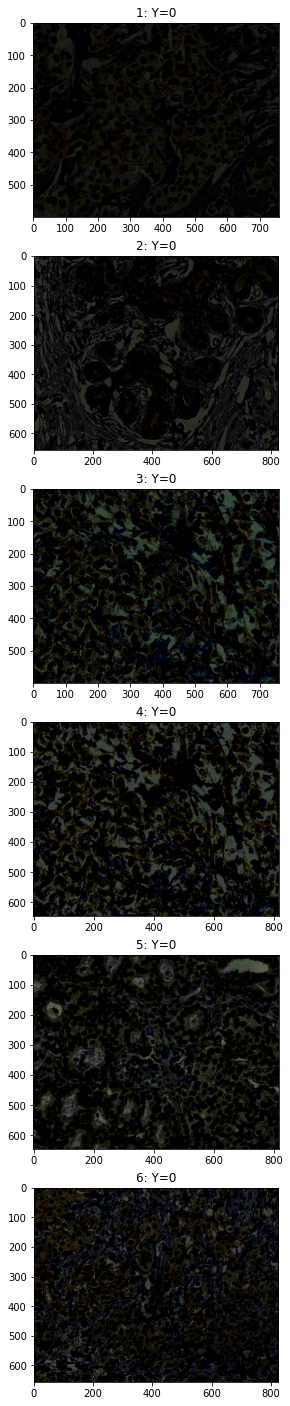

In [21]:
ldr = torch.utils.data.DataLoader(dset2)


plt.figure(figsize=(5,25))
for i, (tensor_x, vec_y, machine, img_loc) in enumerate(ldr):
    #print(machine, img_loc)
    plt.subplot(6, 1, i+1)
    plt.title("{}: Y={}".format(i+1, vec_y[0].numpy().argmax()))
    
    #m = torch.nn.Tanh()
    
    mean = [0.6399, 0.5951, 0.6179]
    mean = [tensor_x[0, 0, :, :].mean(), tensor_x[0, 1, :, :].mean(), tensor_x[0, 2, :, :].mean()]

    m = torch.zeros(tensor_x.shape[1], tensor_x.shape[2], tensor_x.shape[3])
    m[0, :, :] = mean[0]
    m[1, :, :] = mean[1]
    m[2, :, :] = mean[2]
   
 
    norm_img = tensor_x[0] - m
    plt.imshow(norm_img.cpu().numpy().swapaxes(0, -1).swapaxes(0,1))
    
    print('mean', norm_img.cpu().numpy().mean(),'std', norm_img.cpu().numpy().std(), 
          'max', norm_img.cpu().numpy().max(), 'min', norm_img.cpu().numpy().min())
    if i >= 5:
        break

In [ ]:
ldr = torch.utils.data.DataLoader(dset2[0])

plt.figure(figsize=(5,25))
for i, (tensor_x, vec_y) in enumerate(ldr):
    plt.subplot(6, 1, i+1)
    plt.title("{}: Y={}".format(i+1, vec_y[0].numpy().argmax()))
    plt.imshow(tensor_x[0].cpu().numpy().swapaxes(0, -1).swapaxes(0,1))
    if i >= 5:
        break

## Check the training data loader

number batches:

In [ ]:
len(node.loader_tr)

In [ ]:
plt.figure(figsize=(5,100))
for i, (tensor_x, vec_y, vec_d) in enumerate(node.loader_tr):
    plt.subplot(21, 1, i+1)
    plt.title("{}: Y={}, D={}".format(i+1, vec_y[0].numpy().argmax(), vec_d[0].numpy().argmax()))
    plt.imshow(tensor_x[0].cpu().numpy().swapaxes(0, -1).swapaxes(0,1))
    if i >= 20:
        break